In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import cv2
import os
import scipy

In [36]:

##============================CHANGE HERE 'is_tree_images' FOLDER LOCATION================
IS_TREE_IMAGES_PATH = 'is_tree_images'
##========================================================================================

VALIDATE_TREE_IMAGE_PATH = os.path.join(IS_TREE_IMAGES_PATH, 'validate_images/tree/')
VALIDATE_NOT_TREE_IMAGE_PATH = os.path.join(IS_TREE_IMAGES_PATH, 'validate_images/not_tree/')

TRAIN_IMAGE_PATH = os.path.join(IS_TREE_IMAGES_PATH, 'train_images')
VALIDATE_IMAGE_PATH = os.path.join(IS_TREE_IMAGES_PATH, 'validate_images')


(640, 640, 3)

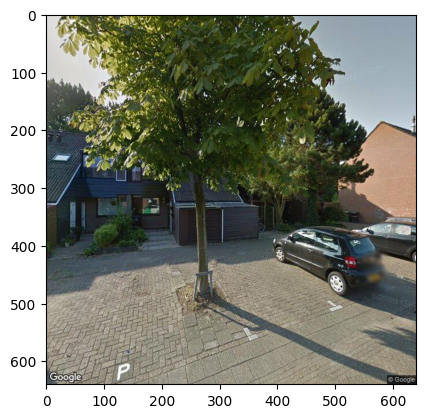

In [37]:
image_path = os.path.join(VALIDATE_TREE_IMAGE_PATH, '16698_2014-07_51-987325991096526_4-364410872550823_Matig.jpg')
img = image.load_img(image_path)
plt.imshow(img)
cv2.imread(image_path).shape

In [38]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

train_dataset = train.flow_from_directory(TRAIN_IMAGE_PATH, target_size = (200,200), batch_size = 3, class_mode = 'binary')
validate_dataset = validation.flow_from_directory(VALIDATE_IMAGE_PATH, target_size = (200,200), batch_size = 3, class_mode = 'binary')

Found 252 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


In [39]:
train_dataset.class_indices

{'not_tree': 0, 'tree': 1}

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

c:\Users\fulvi\anaconda3\envs\reproduction\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [41]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 20,
                      epochs = 30,
                      validation_data = validate_dataset)

Epoch 1/30


c:\Users\fulvi\anaconda3\envs\reproduction\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.5391 - loss: 1.7460 - val_accuracy: 0.5545 - val_loss: 0.6647
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.6141 - loss: 0.5977 - val_accuracy: 0.5545 - val_loss: 0.5341
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.6090 - loss: 0.6042 - val_accuracy: 0.9273 - val_loss: 0.3177
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.9579 - loss: 0.2812 - val_accuracy: 0.9545 - val_loss: 0.1247
Epoch 5/30
 4/20 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.9306 - loss: 0.1775

c:\Users\fulvi\anaconda3\envs\reproduction\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8528 - loss: 0.2765 - val_accuracy: 0.9364 - val_loss: 0.1071
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.8248 - loss: 0.5289 - val_accuracy: 0.9273 - val_loss: 0.4636
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.9616 - loss: 0.3865 - val_accuracy: 0.9727 - val_loss: 0.1272
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.9984 - loss: 0.0949 - val_accuracy: 0.9818 - val_loss: 0.0521
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.9043 - loss: 0.3214 - val_accuracy: 0.9455 - val_loss: 0.1451
Epoch 10/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8986 - loss: 0.0967 - val_accuracy: 0.9818 - val_loss: 0.0344
Epoch 11/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.9258 - loss: 0.2403 - val_accuracy: 1.0000 - val_loss: 0.0324
Epoch 12/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.8871 - loss: 0.3476 - val_accuracy: 0.6636 - val

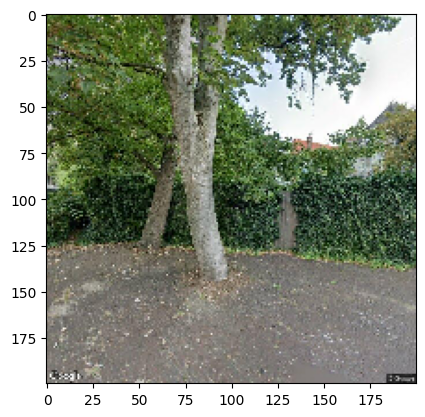

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
a tree


In [43]:
image_path = os.path.join(VALIDATE_TREE_IMAGE_PATH, '13182_2021-09_52-01082266294491_4-355730754059023_Slecht.jpg')

img = image.load_img(image_path, target_size=(200,200))
plt.imshow(img)
plt.show()

X = image.img_to_array(img)
X = np.expand_dims(X,axis = 0)
images = np.vstack([X])
val = model.predict(images)
if val == 0:
    print("not a tree")
else:
    print("a tree")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

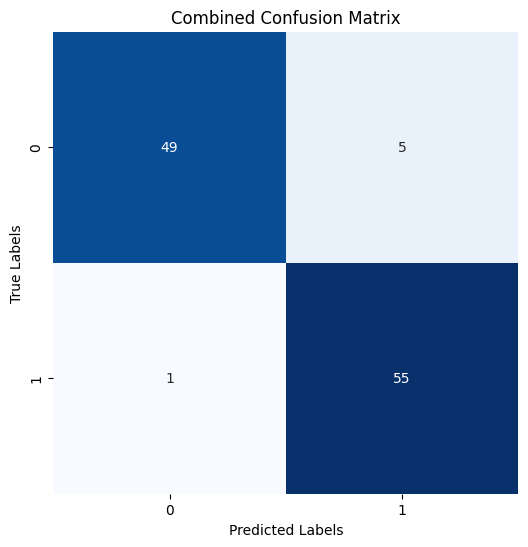

In [44]:
# Function to process a folder of images and return their predictions and true labels
def process_image_folder(folder_path, true_label):
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    y_pred = []
    y_true = [true_label] * len(image_files)
    
    for img_file in image_files:
        img = image.load_img(os.path.join(folder_path, img_file), target_size=(200, 200))
        X = image.img_to_array(img)
        X = np.expand_dims(X, axis=0)
        images = np.vstack([X])
        val = model.predict(images)
        y_pred.append(1 if val[0] > 0.5 else 0)
        
    return y_pred, y_true

# Process both "tree" and "not_tree" folders
y_pred_tree, y_true_tree = process_image_folder(VALIDATE_TREE_IMAGE_PATH, 1)  # True labels for "tree" images are 1
y_pred_not_tree, y_true_not_tree = process_image_folder(VALIDATE_NOT_TREE_IMAGE_PATH, 0)  # True labels for "not_tree" images are 0

# Combine the predictions and true labels
y_pred_combined = y_pred_tree + y_pred_not_tree
y_true_combined = y_true_tree + y_true_not_tree

# Compute the combined confusion matrix
cm_combined = confusion_matrix(y_true_combined, y_pred_combined)

# Plot the combined confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Combined Confusion Matrix')
plt.show()

In [45]:
tf.keras.models.save_model(model, 'is_tree_model.keras')